<a href="https://colab.research.google.com/github/karinasaidene/flower_classification_using_CNN/blob/main/Flower_classifiwation_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #this is an image library in python

In [3]:
data_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
datadir = tf.keras.utils.get_file('flower_photos', origin=data_url, cache_dir='.', untar=True)

In [5]:
datadir

'./datasets/flower_photos'

In [6]:
import pathlib

datadir=pathlib.Path(datadir)
datadir

PosixPath('datasets/flower_photos')

In [7]:
#trying the glob function to extract all the roses

roses= list(datadir.glob('roses/*'))

roses[:5]

[PosixPath('datasets/flower_photos/roses/6347847065_83cf87333b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9353111163_7a89b2df35_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15820572326_be2ea4a55c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5212885371_fe27c406a2_n.jpg')]

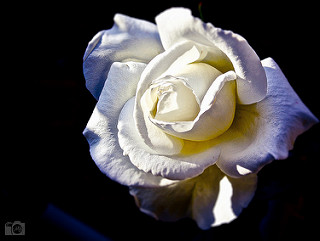

In [8]:
PIL.Image.open(str(roses[1]))

In [10]:
flowers_images_dict={
    'roses':list(datadir.glob('roses/*')),
    'daisy':list(datadir.glob('daisy/*')),
    'dandelion':list(datadir.glob('dandelion/*')),
    'sunflowers': list(datadir.glob('sunflowers/*')),
    'tulips':list(datadir.glob('tulips/*'))
}

In [12]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers': 3,
    'tulips':4,
}

In [17]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(264, 320, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [44]:
X,y = [],[]

for flower_name, images in flowers_images_dict.items():
  for image in images : 
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [45]:
X= np.array(X)
y= np .array(y)

In [46]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train , y_test = train_test_split(X, y, random_state=0)

In [47]:
#scaling to help the model training
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [49]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)              


Epoch 1/10
86/86 [==============================] - 74s 851ms/step - loss: 1.3885 - accuracy: 0.3950
Epoch 2/10
86/86 [==============================] - 73s 844ms/step - loss: 1.0975 - accuracy: 0.5541
Epoch 3/10
86/86 [==============================] - 73s 849ms/step - loss: 0.9668 - accuracy: 0.6359
Epoch 4/10
86/86 [==============================] - 90s 1s/step - loss: 0.7967 - accuracy: 0.7028
Epoch 5/10
86/86 [==============================] - 83s 971ms/step - loss: 0.6112 - accuracy: 0.7754
Epoch 6/10
86/86 [==============================] - 73s 849ms/step - loss: 0.4435 - accuracy: 0.8383
Epoch 7/10
86/86 [==============================] - 74s 857ms/step - loss: 0.2858 - accuracy: 0.9033
Epoch 8/10
86/86 [==============================] - 73s 854ms/step - loss: 0.1635 - accuracy: 0.9459
Epoch 9/10
86/86 [==============================] - 73s 852ms/step - loss: 0.0864 - accuracy: 0.9771
Epoch 10/10
86/86 [==============================] - 73s 849ms/step - loss: 0.0646 - accuracy:

In [50]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 7s 235ms/step - loss: 2.2075 - accuracy: 0.5697


[2.207460641860962, 0.56971675157547]

we have overfitting here !!!!! like the accuracy is much better in training set but when we evaluate with the test set it gives us poor results

In [51]:
predictions= model.predict(X_test_scaled)
predictions

array([[  7.841157 ,   3.8762105,  -7.8900094,  -7.4532976,   3.8539884],
       [ 11.52487  ,  -1.7028053, -10.743957 ,  -9.586772 ,   9.115037 ],
       [  6.271693 ,   3.2115424,   2.1435945, -11.737371 ,   3.1977863],
       ...,
       [ -2.6361299, -20.873175 ,   0.7405793,  15.026519 ,  11.291101 ],
       [ 13.78516  ,   3.2049043, -18.920876 ,  -6.228169 ,  17.490372 ],
       [  2.273924 ,  -2.533685 ,   0.6877269,  -5.515445 ,   2.4425678]],
      dtype=float32)

In [52]:
score = tf.nn.softmax(predictions[5])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.3069467e-02, 7.2427615e-06, 2.5390771e-01, 6.2112516e-01,
       1.0189045e-01], dtype=float32)>

In [53]:
np.argmax(score)

3

In [61]:
y_test[5]

3

In [58]:
data_augmentation = tf.keras.Sequential([
   
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

In [59]:
num_classes = 5

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
86/86 [==============================] - 90s 1s/step - loss: 1.3115 - accuracy: 0.4400
Epoch 2/10
86/86 [==============================] - 86s 1s/step - loss: 1.0153 - accuracy: 0.6039
Epoch 3/10
86/86 [==============================] - 86s 1s/step - loss: 0.9050 - accuracy: 0.6566
Epoch 4/10
86/86 [==============================] - 86s 1s/step - loss: 0.8346 - accuracy: 0.6810
Epoch 5/10
86/86 [==============================] - 86s 997ms/step - loss: 0.7637 - accuracy: 0.7169
Epoch 6/10
86/86 [==============================] - 86s 999ms/step - loss: 0.7206 - accuracy: 0.7144
Epoch 7/10
86/86 [==============================] - 86s 996ms/step - loss: 0.6899 - accuracy: 0.7326
Epoch 8/10
86/86 [==============================] - 85s 994ms/step - loss: 0.6298 - accuracy: 0.7591
Epoch 9/10
86/86 [==============================] - 86s 997ms/step - loss: 0.5882 - accuracy: 0.7831
Epoch 10/10
86/86 [==============================] - 86s 997ms/step - loss: 0.5344 - accuracy: 0.7991


In [60]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 7s 240ms/step - loss: 1.0643 - accuracy: 0.6525


[1.064293622970581, 0.6525054574012756]